<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/Chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


In [ ]:
!ls drive/MyDrive/Colab\ Notebooks
!pwd

'Copy of L1_2.ipynb'   L1_1.ipynb   processed.hungarian.data
 hungarian.data        L1_2.ipynb
/content


In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Colab Notebooks/processed.hungarian.data",sep=",",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
import numpy as np
def replace_question_mark(val):
  if val == '?':
    return np.NaN
  elif type(val)==int:
    return val
  else:
    return float(val)

df2 = df.copy()
for (columnName,_) in df2.iteritems():
  df2[columnName] = df2[columnName].apply(replace_question_mark)

df2.info()
df2.head()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


Imputation Method #1: with **mean** or **median**

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

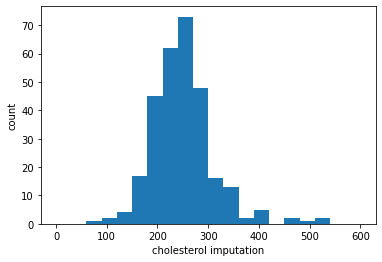

In [ ]:
chol = df2['chol']
plt.hist(chol.apply(lambda x: np.mean(chol) if np.isnan(x) else x), bins=range(0,630,30))
plt.xlabel("cholesterol imputation")
plt.ylabel("count")

Imputation Method #1: with **modus** or **most frequent**

Text(0, 0.5, 'count')

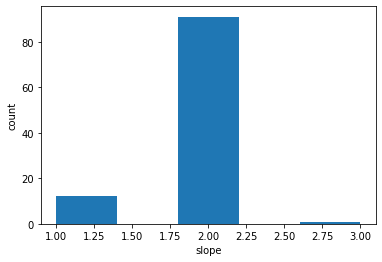

In [ ]:
plt.hist(df2['slope'],bins=5)
plt.xlabel('slope')
plt.ylabel('count')

Text(0, 0.5, 'count')

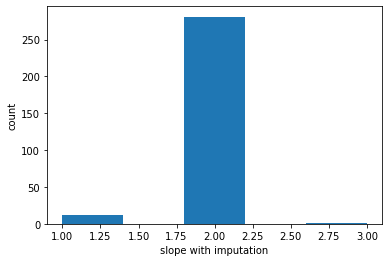

In [ ]:
plt.hist(df2['slope'].apply(lambda x: 2 if np.isnan(x) else x), bins=5)
plt.xlabel('slope with imputation')
plt.ylabel('count')

## Data Standardization

(array([ 27., 122.,  89.,  19.,   6.,   4.,   1.]),
 array([-2, -1,  0,  1,  2,  3,  4,  5]),
 <a list of 7 Patch objects>)

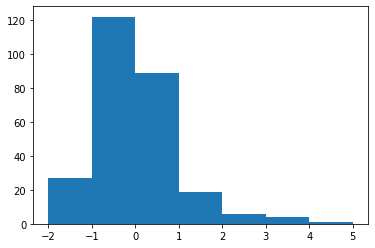

In [ ]:
stdChol = np.std(chol)
meanChol = np.mean(chol)
chol2 = chol.apply(lambda x: (x-meanChol)/stdChol)
plt.hist(chol2,bins = range(int(min(chol2)),int(max(chol2))+1,1))

# Examples involving scikit-learn preprocessing module
For both imputation and standardization, scikit-learn offers similar APIs:
1. Fit the data to learn the imputer and standardizer
2. Use the object to transform new data


In [ ]:
# Imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Note that the imputer and transformer can accept the same input, i.e. dataframe
imputer.fit(df2)
df3 = pd.DataFrame(imputer.transform(df2))

# Check the number of missing value it should be equal to 0
np.sum(np.sum(np.isnan(df3)))

0

In [ ]:
# Standardization
from sklearn import preprocessing

# The scale function provides zero-mean, one-standard deviation
df4 = pd.DataFrame(preprocessing.scale(df2))
df4.mean(axis=0) # there are 14 rows showing mean of each column
df4.std(axis=0)

0     1.001705
1     1.001705
2     1.001705
3     1.001711
4     1.001850
5     1.001753
6     1.001711
7     1.001711
8     1.001711
9     1.001705
10    1.004843
11    0.000000
12    1.018350
13    1.001705
dtype: float64